# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd

In [2]:
# Loading data
con_data = pd.read_csv('compresive_strength_concrete.csv')
con_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
con_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
con_data.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


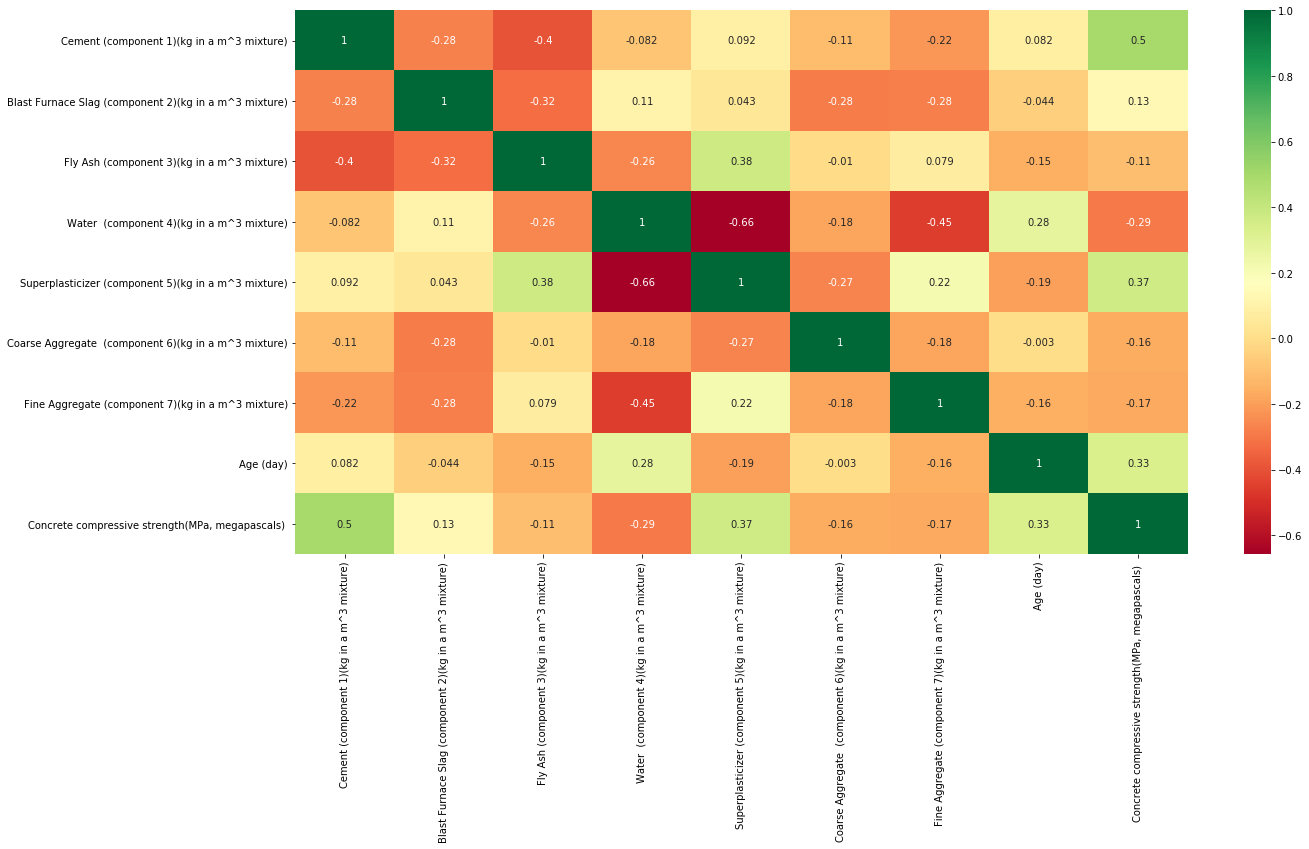

In [6]:
# analysis of features 
import matplotlib.pyplot as plt
import seaborn as sns

features_correlation = con_data.corr()
top_corr_features = features_correlation.index
plt.figure(figsize=(20,10))
g=sns.heatmap(con_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
con_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [8]:
# distributing the data into features and prediction targets
# the several features of dataset for concrete compressive strength
features = ['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']

X = con_data[features]

# as our prediction target is compressive strength of concrete which is the last column
prediction_target = ['Concrete compressive strength(MPa, megapascals) ']
y = con_data[prediction_target]

In [9]:
from sklearn.model_selection import train_test_split

# Split into 50% Training, 30% Test and 20% Validation Data

train_ratio = .5 # i.e. 50%
test_ratio = .3 # 30%
validation_ratio = .2 # 20%

# using train test split method
x_remaining, x_test, y_remaining, y_test = train_test_split(X, y, test_size=test_ratio)

# validation ratio from remaining dataset.
remaining = 1 - test_ratio
validation_adjusted = validation_ratio / remaining

# train and validation splits
x_train, x_validation, y_train, y_validation = train_test_split(x_remaining, y_remaining, test_size=validation_adjusted)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_validation.shape, y_validation.shape)


(514, 8) (514, 1) (309, 8) (309, 1) (207, 8) (207, 1)


In [10]:
# creating and training model
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import *


model = Sequential()
tf.keras.backend.set_floatx('float64')
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1,))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, epochs=100, validation_data=(x_validation, y_validation))

Epoch 1/100
17/17 [==============================] - 0s 10ms/step - loss: 3140.0867 - mae: 48.4067 - val_loss: 598.1151 - val_mae: 18.9423
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 406.4726 - mae: 15.9409 - val_loss: 329.8368 - val_mae: 14.3875
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 296.6771 - mae: 13.6735 - val_loss: 289.3406 - val_mae: 13.5961
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 264.5565 - mae: 13.0812 - val_loss: 234.4253 - val_mae: 12.3578
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 236.2831 - mae: 12.2930 - val_loss: 208.9689 - val_mae: 11.5743
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 211.4135 - mae: 11.7074 - val_loss: 212.7869 - val_mae: 11.5830
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 190.4703 - mae: 11.0084 - val_loss: 191.9049 - val_mae: 11.1652
Epoch 8/100
17/17 [====================

Epoch 61/100
17/17 [==============================] - 0s 4ms/step - loss: 120.3182 - mae: 8.6758 - val_loss: 132.3964 - val_mae: 9.1685
Epoch 62/100
17/17 [==============================] - 0s 4ms/step - loss: 120.6993 - mae: 8.6836 - val_loss: 139.9477 - val_mae: 8.8392
Epoch 63/100
17/17 [==============================] - 0s 4ms/step - loss: 111.9746 - mae: 8.4731 - val_loss: 126.3870 - val_mae: 8.4422
Epoch 64/100
17/17 [==============================] - 0s 4ms/step - loss: 114.8497 - mae: 8.4302 - val_loss: 188.0634 - val_mae: 10.5683
Epoch 65/100
17/17 [==============================] - 0s 4ms/step - loss: 115.8295 - mae: 8.5974 - val_loss: 173.9838 - val_mae: 10.0290
Epoch 66/100
17/17 [==============================] - 0s 4ms/step - loss: 112.6685 - mae: 8.4019 - val_loss: 341.5355 - val_mae: 15.5738
Epoch 67/100
17/17 [==============================] - 0s 4ms/step - loss: 116.4027 - mae: 8.4801 - val_loss: 123.0233 - val_mae: 8.3655
Epoch 68/100
17/17 [=========================

# Evaluation using test values

In [11]:
evalution_test = model.evaluate(x_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


# Evaluation using validation values

In [12]:
evaluation_validation = model.evaluate(x_validation)

7/7 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


# Predictions using test values

In [27]:
pred_test = model.predict(x_test[0:5])
print(pred_test)

[[27.61904799]
 [24.85258577]
 [30.83364132]
 [35.62875483]
 [26.81381928]]


# Predictions using validation values

In [14]:
prediction_validation = model.predict(x_validation)

In [15]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_validation, prediction_validation)
print(MAE)

8.454575763239571
